# Evaluación del modelo con nuevos datos
Este notebook permite cargar el modelo entrenado y probarlo con datos nuevos que nunca ha visto.

In [51]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# 2. Cargar el modelo entrenado
modelo = joblib.load('../models/DecisionTreeClassifier_emg_v2_entropy.pkl')
print('Modelo cargado correctamente')

Modelo cargado correctamente


## Cargar y preparar los nuevos datos
Reemplaza la ruta y el nombre del archivo por el de tus nuevos datos.

In [53]:
# 3. Cargar nuevos datos
df_nuevos = pd.read_parquet('../data/processed/final_feature_data_sujeto_03.parquet')
X_nuevos = df_nuevos.drop('Clase', axis=1)
y_nuevos = df_nuevos['Clase']
print(y_nuevos)

1          basal
2          basal
3          basal
4          basal
5          basal
           ...  
118826    reposo
118827    reposo
118828    reposo
118829    reposo
118830    reposo
Name: Clase, Length: 118825, dtype: object


## Realizar predicciones y evaluar el desempeño

In [55]:
# 3.4 Codificar las etiquetas de texto a números para poder comparar
# ¡Importante! El modelo devolverá números, así que necesitamos la "verdad" también en números.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Como las clases son las mismas que en el entrenamiento, podemos ajustar el encoder aquí
y_verdadero_numeros = label_encoder.fit_transform(y_nuevos)

print("\nDatos nuevos listos para la evaluación.")
display(X_nuevos.head())


Datos nuevos listos para la evaluación.


,RMS_EXG Channel 0,WL_EXG Channel 0,RMS_EXG Channel 1,WL_EXG Channel 1,RMS_EXG Channel 2,WL_EXG Channel 2,RMS_EXG Channel 3,WL_EXG Channel 3,RMS_EXG Channel 4,WL_EXG Channel 4,RMS_EXG Channel 5,WL_EXG Channel 5,RMS_EXG Channel 6,WL_EXG Channel 6,RMS_EXG Channel 7,WL_EXG Channel 7
1,0.477403,0.166017,1.787390,0.030645,1.274388,0.196248,1.798903,0.021309,1.760000,0.214317,1.807076,0.170841,1.488721,0.038703,1.701189,0.013358
2,0.417499,0.460141,1.775970,0.080385,1.288570,0.248499,1.789074,0.040272,1.727356,0.224884,1.737128,0.473302,1.487258,0.062324,1.710072,0.046561
3,0.365154,0.617007,1.762906,0.110175,1.252969,0.425468,1.788176,0.056496,1.757744,0.410650,1.664513,0.636684,1.478468,0.094868,1.719996,0.068289
4,0.344218,0.757926,1.759496,0.132848,1.231683,0.428539,1.793491,0.085614,1.782207,0.441615,1.647050,0.787313,1.476666,0.112522,1.722352,0.085972
5,0.331372,0.772567,1.758975,0.143426,1.242027,0.578466,1.795587,0.094180,1.770546,0.607439,1.642655,0.832550,1.479052,0.134008,1.722540,0.094241


In [56]:
# 4. Predecir y evaluar
y_pred_nuevos = modelo.predict(X_nuevos)
print('Accuracy:', accuracy_score(y_nuevos , y_pred_nuevos))
print('Reporte de clasificación:')
print(classification_report(y_nuevos , y_pred_nuevos))

Accuracy: 0.14002945508100148
Reporte de clasificación:


/Users/silviamoreno/Documents/Hernando/AI/Experimento_robot/Robot_Human_Interfase_v0/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

    adelante       0.18      0.00      0.01     15359
       atras       0.34      0.99      0.50     15359
       basal       0.01      0.01      0.01     30719
     derecha       0.00      0.01      0.01     15359
   izquierda       1.00      0.06      0.10     15359
      reposo       0.00      0.00      0.00     26670

    accuracy                           0.14    118825
   macro avg       0.26      0.18      0.11    118825
weighted avg       0.20      0.14      0.08    118825



/Users/silviamoreno/Documents/Hernando/AI/Experimento_robot/Robot_Human_Interfase_v0/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/silviamoreno/Documents/Hernando/AI/Experimento_robot/Robot_Human_Interfase_v0/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


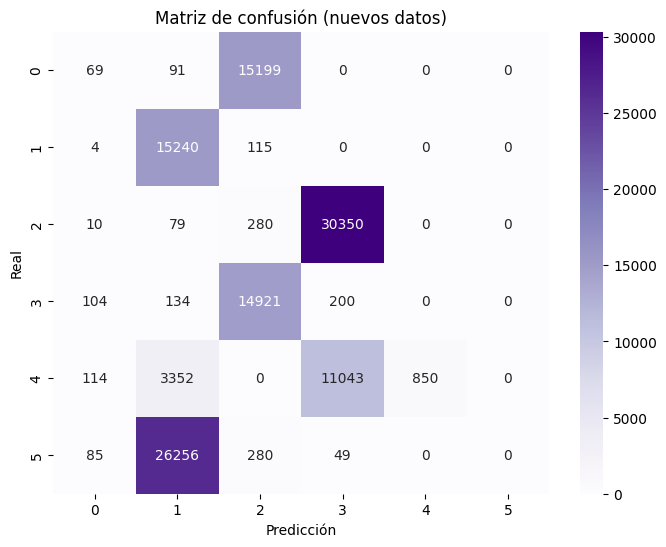

In [57]:
# 5. Matriz de confusión
cm_nuevos = confusion_matrix(y_nuevos, y_pred_nuevos)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nuevos, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión (nuevos datos)')
plt.show()